## You are a junior data analyst working on the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.


## Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.


## Moreno has assigned you the first question to answer: How do annual members and casual riders use Cyclistic bikes differently?
  

# 1. Business Task

### Business Question: How do annual members and casual riders use Cyclistic bikes differently?
### How to achieve this: Produce insights and visualizations that show behavioral differences so Moreno can design targeted campaigns to convert casual riders into annual members.

## 2. Description of all data sources used

### I have downloaded past 12 months of data (September 2024 to August 2025) from https://divvy-tripdata.s3.amazonaws.com/index.html.


## 3. Documentation of cleaning/manipulating data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
# CSV file path
files = glob.glob("Data/*.csv")

# Load all CSVs and combine
df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)

print("Rows loaded:", len(df))
df.head()

Rows loaded: 5646038


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,7569BC890583FCD7,classic_bike,2025-01-21 17:23:54.538,2025-01-21 17:37:52.015,Wacker Dr & Washington St,KA1503000072,McClurg Ct & Ohio St,TA1306000029,41.883143,-87.637242,41.892592,-87.617289,member
1,013609308856B7FC,electric_bike,2025-01-11 15:44:06.795,2025-01-11 15:49:11.139,Halsted St & Wrightwood Ave,TA1309000061,Racine Ave & Belmont Ave,TA1308000019,41.929147,-87.649153,41.939743,-87.658865,member
2,EACACD3CE0607C0D,classic_bike,2025-01-02 15:16:27.730,2025-01-02 15:28:03.230,Southport Ave & Waveland Ave,13235,Broadway & Cornelia Ave,13278,41.948226,-87.664071,41.945529,-87.646439,member
3,EAA2485BA64710D3,classic_bike,2025-01-23 08:49:05.814,2025-01-23 08:52:40.047,Southport Ave & Waveland Ave,13235,Southport Ave & Roscoe St,13071,41.948226,-87.664071,41.943739,-87.664020,member
4,7F8BE2471C7F746B,electric_bike,2025-01-16 08:38:32.338,2025-01-16 08:41:06.767,Southport Ave & Waveland Ave,13235,Southport Ave & Roscoe St,13071,41.948226,-87.664071,41.943739,-87.664020,member


In [3]:
# Convert datetime columns
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Calculate ride_length in minutes
df['ride_length'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Filter out rides <1 minute or >24 hours
df = df[(df['ride_length'] >= 1) & (df['ride_length'] <= 1440)]

# Ride length in HH:MM:SS
df['ride_length_hms'] = pd.to_timedelta(df['ride_length'], unit='m')

# change weekday format (1=Sunday, 7=Saturday)
df['day_of_week'] = df['started_at'].dt.weekday  # Monday=0 ... Sunday=6
df['day_of_week'] = ((df['day_of_week'] + 1) % 7) + 1

# Day name (optional)
df['day_name'] = df['started_at'].dt.day_name()

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,ride_length_hms,day_of_week,day_name
0,7569BC890583FCD7,classic_bike,2025-01-21 17:23:54.538,2025-01-21 17:37:52.015,Wacker Dr & Washington St,KA1503000072,McClurg Ct & Ohio St,TA1306000029,41.883143,-87.637242,41.892592,-87.617289,member,13.957950,0 days 00:13:57.477000,3,Tuesday
1,013609308856B7FC,electric_bike,2025-01-11 15:44:06.795,2025-01-11 15:49:11.139,Halsted St & Wrightwood Ave,TA1309000061,Racine Ave & Belmont Ave,TA1308000019,41.929147,-87.649153,41.939743,-87.658865,member,5.072400,0 days 00:05:04.344000,7,Saturday
2,EACACD3CE0607C0D,classic_bike,2025-01-02 15:16:27.730,2025-01-02 15:28:03.230,Southport Ave & Waveland Ave,13235,Broadway & Cornelia Ave,13278,41.948226,-87.664071,41.945529,-87.646439,member,11.591667,0 days 00:11:35.500000002,5,Thursday
3,EAA2485BA64710D3,classic_bike,2025-01-23 08:49:05.814,2025-01-23 08:52:40.047,Southport Ave & Waveland Ave,13235,Southport Ave & Roscoe St,13071,41.948226,-87.664071,41.943739,-87.664020,member,3.570550,0 days 00:03:34.233000,5,Thursday
4,7F8BE2471C7F746B,electric_bike,2025-01-16 08:38:32.338,2025-01-16 08:41:06.767,Southport Ave & Waveland Ave,13235,Southport Ave & Roscoe St,13071,41.948226,-87.664071,41.943739,-87.664020,member,2.573817,0 days 00:02:34.429000002,5,Thursday


In [4]:
# perform descriptive analysis

print("Mean ride length (min):", df['ride_length'].mean())
print("Max ride length (min):", df['ride_length'].max())
print("Mode of day_of_week:", df['day_of_week'].mode()[0])

Mean ride length (min): 14.937579082447268
Max ride length (min): 1439.9345666666666
Mode of day_of_week: 7


## 4. Create supporting visualizations and present key findings

In [5]:
# Pivot table for Average ride length for members vs casual
avg_by_user = df.pivot_table(values='ride_length', index='member_casual', aggfunc='mean')
avg_by_user

,ride_length
member_casual,
casual,20.111163
member,11.988989


In [6]:
# Pivot Table for Average ride length by user × day_of_week
avg_by_user_day = df.pivot_table(values='ride_length',
                                 index='member_casual',
                                 columns='day_of_week',
                                 aggfunc='mean')
avg_by_user_day

day_of_week,1,2,3,4,5,6,7
member_casual,,,,,,,
casual,23.323720,19.692676,17.603475,16.784422,17.643556,19.65784,22.751418
member,13.247636,11.518992,11.589051,11.480394,11.600698,11.91454,13.103748


In [7]:
# Pivot Table for Count of rides by user × day_of_week
rides_by_day = df.pivot_table(values='ride_id',
                              index='member_casual',
                              columns='day_of_week',
                              aggfunc='count')
rides_by_day

day_of_week,1,2,3,4,5,6,7
member_casual,,,,,,,
casual,344977,232618,222919,226545,254409,310508,405377
member,392213,506524,551262,543541,555132,511852,444023


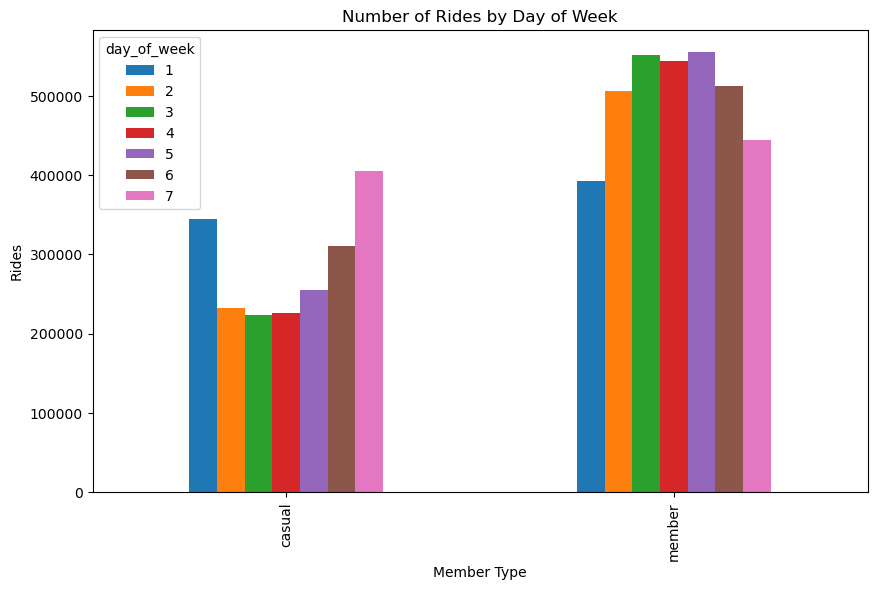

In [8]:
# Bar chart for Number of rides by day of week
rides_by_day.plot(kind='bar', figsize=(10,6))
plt.title("Number of Rides by Day of Week")
plt.ylabel("Rides")
plt.xlabel("Member Type")
plt.show()

### From the bar chart, it can be seen that members usually ride more in the weekdays as compared to the weekends and for casual riders it is vice versa

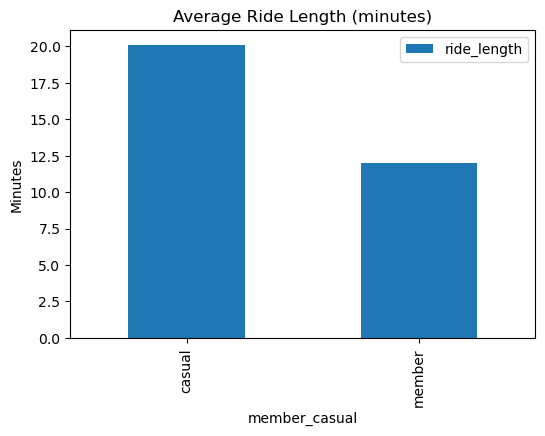

In [9]:
# Bar Chart for Average ride length by user type
avg_by_user.plot(kind='bar', figsize=(6,4))
plt.title("Average Ride Length (minutes)")
plt.ylabel("Minutes")
plt.show()

### Casual riders are riding for longer periods of time compared to member riders

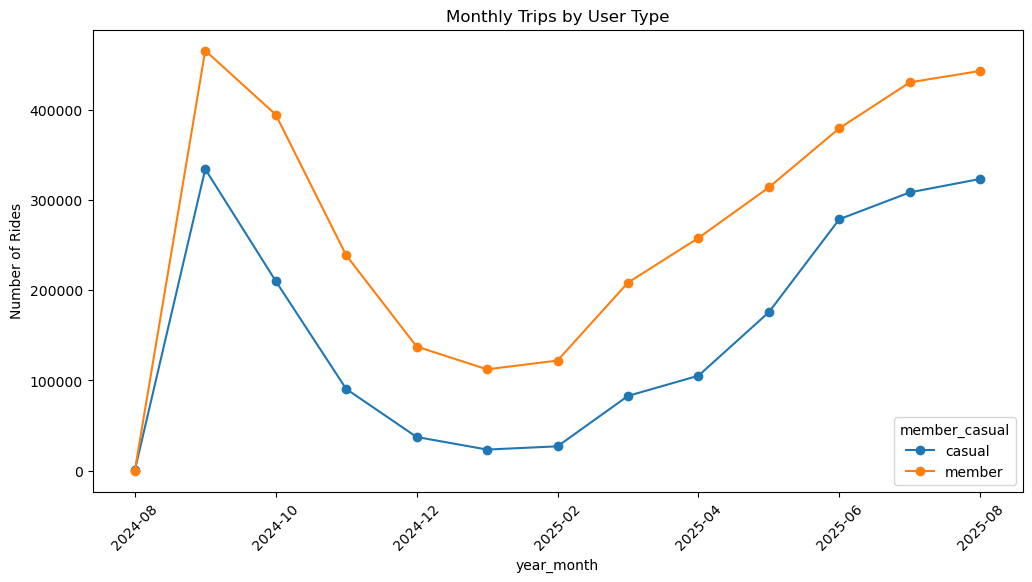

In [10]:
# Line graph for monthly trends
df['year_month'] = df['started_at'].dt.to_period('M').astype(str)

monthly = df.groupby(['year_month','member_casual']).size().reset_index(name='rides')
pivot_monthly = monthly.pivot(index='year_month', columns='member_casual', values='rides')

pivot_monthly.plot(kind='line', marker='o', figsize=(12,6))
plt.title("Monthly Trips by User Type")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.show()

### The line graph shows that casual riders are highly seasonal, with ridership peaking in summer months and dropping in winter, while members maintain steadier usage across the year. This suggests casuals primarily use bikes for leisure or tourism, while members rely on them for commuting. The sharp summer spike in casual ridership represents a prime opportunity to market seasonal memberships or discounts to encourage conversion.

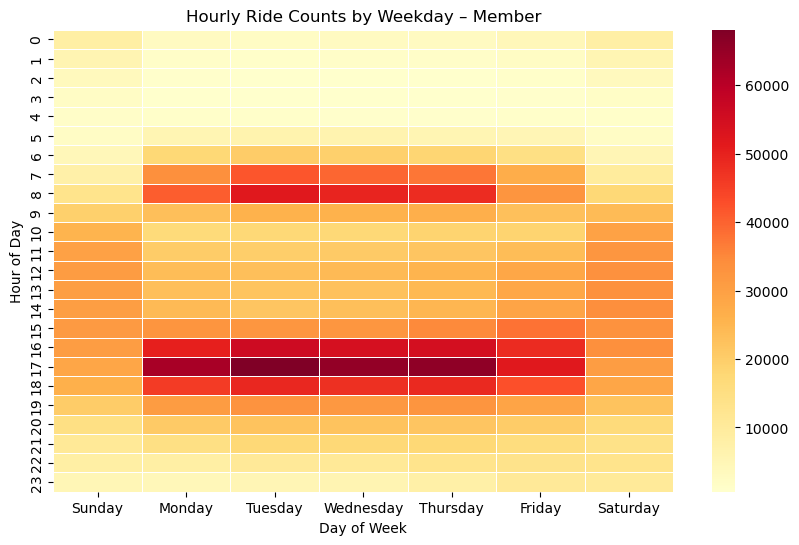

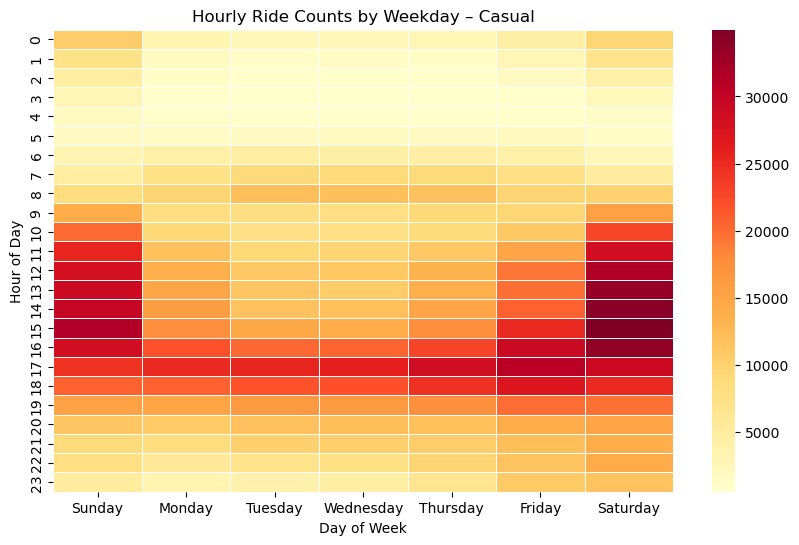

In [11]:
# Heatmap of rides by hour × weekday
import seaborn as sns  

# Make sure we have start_hour
df['start_hour'] = df['started_at'].dt.hour

# Excel-style weekday (already created earlier), but let's keep order
day_order = [1,2,3,4,5,6,7]
day_labels = {1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday',
              5:'Thursday', 6:'Friday', 7:'Saturday'}

for user in df['member_casual'].unique():
    sub = df[df['member_casual'] == user]

    # Group by weekday + hour
    heat = sub.groupby(['day_of_week','start_hour']).size().reset_index(name='count')

    # Pivot to 2D table
    heat_pivot = heat.pivot(index='start_hour', columns='day_of_week', values='count').fillna(0)
    heat_pivot = heat_pivot[day_order]  # reorder columns Sunday..Saturday
    heat_pivot.columns = [day_labels[d] for d in heat_pivot.columns]

    # Plot with seaborn
    plt.figure(figsize=(10,6))
    sns.heatmap(heat_pivot, cmap="YlOrRd", linewidths=.5)
    plt.title(f"Hourly Ride Counts by Weekday – {user.capitalize()}")
    plt.ylabel("Hour of Day")
    plt.xlabel("Day of Week")
    plt.show()


### From the heatmap it can be seen that:
### Members usually light up around 7–9 AM and 4–6 PM on weekdays (commute peaks).
### Casuals often light up around midday on weekends (leisure rides).

## 5. Top 3 recommendations based on analysis

### Recommendation 1: Members often ride during weekday mornings/evenings (commuter peaks). Casual riders are less frequent at those times. Therefore, Market annual memberships as a cost-saving commuter pass (e.g., “Unlimited weekday rides to work for less than your coffee budget”).

### Recommendation 2: Casual riders spike on weekends and in summer months for leisure rides, with longer ride durations. Therefore, Offer trial monthly memberships or seasonal passes tailored for leisure riders.

### Recommendation 3: Casual riders cluster at popular tourist or recreational stations (e.g., parks, lakefront, downtown attractions). Therefore, Place digital ads, QR codes, or app-based discounts at those stations promoting the benefits of membership.